Housing Price Prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
trainset=pd.read_csv('train.csv')

testset=pd.read_csv('test.csv')

In [4]:
trainset.shape

(1460, 81)

In [5]:
testset.shape

(1459, 80)

In [6]:
trainset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Dropping MSSubClass, Id, Street, MoSold, MiscFeature, GarageCars columns

In [7]:
trainset.drop(['Id','MSSubClass','Street','MoSold','MiscFeature','GarageCars'], axis = 1,inplace=True)

testset.drop(['Id','MSSubClass','Street','MoSold','MiscFeature','GarageCars'], axis = 1,inplace=True)

In [8]:
trainset.shape  #81-6

(1460, 75)

In [9]:
testset.shape  #80-6

(1459, 74)

Checking for null values

In [10]:
trainset.isnull().sum()

MSZoning            0
LotFrontage       259
LotArea             0
Alley            1369
LotShape            0
                 ... 
MiscVal             0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 75, dtype: int64

In [11]:
testset.isnull().sum()

MSZoning            4
LotFrontage       227
LotArea             0
Alley            1352
LotShape            0
                 ... 
Fence            1169
MiscVal             0
YrSold              0
SaleType            1
SaleCondition       0
Length: 74, dtype: int64

Replacing all the 'NA' values in Alley column with 'None'

In [12]:
trainset["Alley"].fillna("None", inplace = True) 

testset["Alley"].fillna("None", inplace = True) 

In [13]:
trainset.isnull().sum()

MSZoning           0
LotFrontage      259
LotArea            0
Alley              0
LotShape           0
                ... 
MiscVal            0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

In [14]:
trainset.head(5)

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2008,WD,Normal,208500
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,2007,WD,Normal,181500
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,2008,WD,Normal,223500
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2006,WD,Abnorml,140000
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,2008,WD,Normal,250000


In [15]:
testset.isnull().sum()

MSZoning            4
LotFrontage       227
LotArea             0
Alley               0
LotShape            0
                 ... 
Fence            1169
MiscVal             0
YrSold              0
SaleType            1
SaleCondition       0
Length: 74, dtype: int64

Replacing empty values in LotFrontage column by mean of all the other values in the column

In [16]:
trainset['LotFrontage']=trainset['LotFrontage'].replace(np.NaN,trainset['LotFrontage'].mean())

testset['LotFrontage']=testset['LotFrontage'].replace(np.NaN,testset['LotFrontage'].mean())

In [17]:
trainset.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [18]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,0,2008,WD,Normal,208500
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,0,2007,WD,Normal,181500
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,0,2008,WD,Normal,223500
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,0,2006,WD,Abnorml,140000
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,0,2008,WD,Normal,250000


Replacing all the 'NA' values in Fence column with 'None'



In [19]:
trainset["Fence"].fillna("None", inplace = True)

testset["Fence"].fillna("None", inplace = True)

In [20]:
testset.isnull().sum()

MSZoning         4
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
Fence            0
MiscVal          0
YrSold           0
SaleType         1
SaleCondition    0
Length: 74, dtype: int64

Replacing empty values in SaleType and MSZoning column with the mode of the other values in the column

In [21]:
trainset['SaleType'] = trainset['SaleType'].fillna(trainset['SaleType'].mode()[0])

trainset['MSZoning'] = trainset['MSZoning'].fillna(trainset['MSZoning'].mode()[0])

testset['SaleType'] = testset['SaleType'].fillna(testset['SaleType'].mode()[0])

testset['MSZoning'] = testset['MSZoning'].fillna(testset['MSZoning'].mode()[0])


In [22]:
testset.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
Fence            0
MiscVal          0
YrSold           0
SaleType         0
SaleCondition    0
Length: 74, dtype: int64

Adding a current_year column

In [23]:
trainset['current_year']=2021
testset['current_year']=2021

Adding a years_since_built column

In [24]:
trainset['years_since_built']=trainset['current_year']-trainset['YearBuilt']
testset['years_since_built']=testset['current_year']-testset['YearBuilt']

In [25]:
trainset.shape

(1460, 77)

In [26]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,current_year,years_since_built
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,2008,WD,Normal,208500,2021,18
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,2007,WD,Normal,181500,2021,45
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,2008,WD,Normal,223500,2021,20
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,2006,WD,Abnorml,140000,2021,106
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,2008,WD,Normal,250000,2021,21


In [27]:
trainset.drop(['YearBuilt'],axis=1,inplace=True)
testset.drop(['YearBuilt'],axis=1,inplace=True)

In [28]:
trainset.shape

(1460, 76)

Adding a years_since_remodeled column

In [29]:
trainset['years_since_remodeled']=trainset['current_year']-trainset['YearRemodAdd']
testset['years_since_remodeled']=testset['current_year']-testset['YearRemodAdd']

trainset.drop(['YearRemodAdd'],axis=1,inplace=True)
testset.drop(['YearRemodAdd'],axis=1,inplace=True)

In [30]:
trainset.shape

(1460, 76)

Adding a years_since_sold column

In [31]:
trainset['years_since_sold']=trainset['current_year']-trainset['YrSold']
testset['years_since_sold']=testset['current_year']-testset['YrSold']

trainset.drop(['YrSold'],axis=1,inplace=True)
testset.drop(['YrSold'],axis=1,inplace=True)

trainset.shape

(1460, 76)

In [32]:
testset.shape

(1459, 75)

After studying the dataset, it is seen that in most cases GarageYrBlt=YearBuilt, so we drop GarageYrBlt

In [33]:
trainset.drop(['GarageYrBlt'], axis = 1,inplace=True)
testset.drop(['GarageYrBlt'], axis = 1,inplace=True)
trainset.shape

(1460, 75)

Removing current_year column

In [34]:
trainset.drop(['current_year'], axis = 1,inplace=True)
testset.drop(['current_year'], axis = 1,inplace=True)
trainset.shape

(1460, 74)

After studying the dataset it is observed that TotalBsmtSF=BsmtFinSF1+BsmtFinSF2+BsmtUnfSf, so we add a new column BsmtFin=BsmtFinSF1+BsmtFinSF2

In [35]:
testset['TotalBsmtSF'].isnull().sum()

1

In [36]:
#testset['TotalBsmtSF']=testset['TotalBsmtSF'].replace(np.NaN,testset['TotalBsmtSF'].mean())

testset['TotalBsmtSF']=testset['TotalBsmtSF'].fillna('0').astype(int)

In [37]:
testset['BsmtFinSF1'].isnull().sum()
testset['BsmtFinSF2'].isnull().sum()

1

In [38]:
#testset['BsmtFinSF1']=testset['BsmtFinSF1'].replace(np.NaN,testset['BsmtFinSF1'].mean())
#testset['BsmtFinSF2']=testset['BsmtFinSF2'].replace(np.NaN,testset['BsmtFinSF1'].mean())
testset['BsmtFinSF1']=testset['BsmtFinSF1'].fillna('0').astype(int)
testset['BsmtFinSF2']=testset['BsmtFinSF2'].fillna('0').astype(int)

In [39]:
trainset['BsmtFin']=trainset['BsmtFinSF1']+trainset['BsmtFinSF2']
testset['BsmtFin']=testset['BsmtFinSF1']+testset['BsmtFinSF2']
trainset.shape

(1460, 75)

In [40]:
#Dropping BsmtFinSF1 and BsmtFinSF2
trainset.drop(['BsmtFinSF1','BsmtFinSF2'], axis = 1,inplace=True)
testset.drop(['BsmtFinSF1','BsmtFinSF2'], axis = 1,inplace=True)
trainset.shape

(1460, 73)

In [41]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655


Since we have totalBsmtSF and BsmtFin, we can drop BsmtUnfSF

In [42]:
trainset.drop(['BsmtUnfSF'], axis = 1,inplace=True)
testset.drop(['BsmtUnfSF'], axis = 1,inplace=True)

In [43]:
trainset.shape

(1460, 72)

In [44]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655


TotalFullBath=BsmtFullBath+FullBath and TotalHalfBath=BsmtHalfBath+HalfBath

In [45]:
#testset['BsmtFullBath'] = testset['BsmtFullBath'].fillna(testset['BsmtFullBath'].mode()[0])
#testset['BsmtHalfBath'] = testset['BsmtHalfBath'].fillna(testset['BsmtFullBath'].mode()[0])
testset['BsmtFullBath']=testset['BsmtFullBath'].fillna('0').astype(int)
testset['BsmtHalfBath']=testset['BsmtHalfBath'].fillna('0').astype(int)

In [46]:
trainset['TotalFullBath']=trainset['BsmtFullBath']+trainset['FullBath']
testset['TotalFullBath']=testset['BsmtFullBath']+testset['FullBath']
trainset['TotalHalfBath']=trainset['BsmtHalfBath']+trainset['HalfBath']
testset['TotalHalfBath']=testset['BsmtHalfBath']+testset['HalfBath']

trainset.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], axis = 1,inplace=True)
testset.drop(['BsmtFullBath','FullBath','BsmtHalfBath','HalfBath'], axis = 1,inplace=True)

trainset.shape

(1460, 70)

TotFlrSF=1stFlrSF+2ndFlrSF

In [47]:
trainset['TotFlrSF']=trainset['1stFlrSF']+trainset['2ndFlrSF']
testset['TotFlrSF']=testset['1stFlrSF']+testset['2ndFlrSF']

trainset.drop(['1stFlrSF','2ndFlrSF'], axis = 1,inplace=True)
testset.drop(['1stFlrSF','2ndFlrSF'], axis = 1,inplace=True)

trainset.shape

(1460, 69)

In [48]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198


TotPorchArea=OpenPorchSF+EnclosedPorch+3SsnPorch+ScreenPorch

In [49]:
trainset['TotPorchArea']=trainset['OpenPorchSF']+trainset['EnclosedPorch']+trainset['3SsnPorch']+trainset['ScreenPorch']
testset['TotPorchArea']=testset['OpenPorchSF']+testset['EnclosedPorch']+testset['3SsnPorch']+testset['ScreenPorch']

trainset.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis = 1,inplace=True)
testset.drop(['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'], axis = 1,inplace=True)

trainset.shape


(1460, 66)

In [50]:
trainset.head()

,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea
0,RL,65.0,8450,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61
1,RL,80.0,9600,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0
2,RL,68.0,11250,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42
3,RL,60.0,9550,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307
4,RL,84.0,14260,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84


In [51]:
trainset.isnull().sum()

MSZoning         0
LotFrontage      0
LotArea          0
Alley            0
LotShape         0
                ..
BsmtFin          0
TotalFullBath    0
TotalHalfBath    0
TotFlrSF         0
TotPorchArea     0
Length: 66, dtype: int64

In [52]:
trainset.drop(['Utilities'], axis = 1,inplace=True)
testset.drop(['Utilities'], axis = 1,inplace=True)

In [53]:
trainset.shape

(1460, 65)

Working with MSZoning Column

In [54]:
trainset.value_counts('MSZoning')


MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
dtype: int64

In [55]:
testset.value_counts('MSZoning')

MSZoning
RL         1118
RM          242
FV           74
C (all)      15
RH           10
dtype: int64

In [56]:
#replacing 'RH' and 'C(all)' with RL(mode)
trainset['MSZoning'] = trainset['MSZoning'].replace(['RH','C (all)'],'RL')
testset['MSZoning'] = testset['MSZoning'].replace(['RH','C (all)'],'RL')
testset.value_counts('MSZoning')

MSZoning
RL    1143
RM     242
FV      74
dtype: int64

In [57]:
trainset= pd.get_dummies(trainset,columns=['MSZoning'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['MSZoning'], prefix_sep='_', drop_first=True)

In [58]:
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with 'Alley' column

In [59]:
trainset.value_counts('Alley')

Alley
None    1369
Grvl      50
Pave      41
dtype: int64

In [60]:
testset.value_counts('Alley')

Alley
None    1352
Grvl      70
Pave      37
dtype: int64

In [61]:
#combining 'Grvl' and 'Pave' into 1 category i.e. 'Yes'
trainset.loc[(trainset['Alley'] == 'Grvl') | (trainset['Alley'] == 'Pave') , 'Alley'] = 'Yes'
testset.loc[(testset['Alley'] == 'Grvl') | (testset['Alley'] == 'Pave') , 'Alley'] = 'Yes'
trainset.value_counts('Alley')

Alley
None    1369
Yes       91
dtype: int64

In [62]:
#Label Encoding Alley column
from sklearn.preprocessing import LabelEncoder
trainset['Alley'] = LabelEncoder().fit_transform(trainset['Alley'])
testset['Alley'] = LabelEncoder().fit_transform(testset['Alley'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LotShape column

In [63]:
trainset.value_counts('LotShape')

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
dtype: int64

In [64]:
testset.value_counts('LotShape')

LotShape
Reg    934
IR1    484
IR2     35
IR3      6
dtype: int64

In [65]:
#combining IR1,IR2,IR3 into 1 category i.e. IR
trainset.loc[(trainset['LotShape'] =='IR1') | (trainset['LotShape']=='IR2') | (trainset['LotShape']=='IR3') ,'LotShape'] = 'IR'
testset.loc[(testset['LotShape'] =='IR1') | (testset['LotShape']=='IR2') | (testset['LotShape']=='IR3') ,'LotShape'] = 'IR'
testset.value_counts('LotShape')

LotShape
Reg    934
IR     525
dtype: int64

In [66]:
#Label Encoding 'LotShape' column
from sklearn.preprocessing import LabelEncoder
trainset['LotShape'] = LabelEncoder().fit_transform(trainset['LotShape'])
testset['LotShape'] = LabelEncoder().fit_transform(testset['LotShape'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,1,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,0,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,0,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,0,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LandContour column

In [67]:
trainset.value_counts('LandContour')

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
dtype: int64

In [68]:
testset.value_counts('LandContour')

LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
dtype: int64

In [69]:
#combining Bnk,HLS,Low into one category i.e Other
trainset.loc[(trainset['LandContour'] =='Bnk') | (trainset['LandContour']=='HLS') | (trainset['LandContour']=='Low') ,'LandContour'] = 'Other'
testset.loc[(testset['LandContour'] =='Bnk') | (testset['LandContour']=='HLS') | (testset['LandContour']=='Low') ,'LandContour'] = 'Other'
testset.value_counts('LandContour')

LandContour
Lvl      1311
Other     148
dtype: int64

In [70]:
#Label Encoding LandContour colum
from sklearn.preprocessing import LabelEncoder
trainset['LandContour'] = LabelEncoder().fit_transform(trainset['LandContour'])
testset['LandContour'] = LabelEncoder().fit_transform(testset['LandContour'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM
0,65.0,8450,0,1,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0
1,80.0,9600,0,1,0,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0
2,68.0,11250,0,0,0,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0
3,60.0,9550,0,0,0,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0
4,84.0,14260,0,0,0,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0


Working with LotConfig column

In [71]:
trainset.value_counts('LotConfig')

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
dtype: int64

In [72]:
testset.value_counts('LotConfig')

LotConfig
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
dtype: int64

In [73]:
#combining FR2 and FR3 to FR23
trainset.loc[(trainset['LotConfig'] == 'FR2') | (trainset['LotConfig'] == 'FR3') , 'LotConfig'] = 'FR23'
testset.loc[(testset['LotConfig'] == 'FR2') | (testset['LotConfig'] == 'FR3') , 'LotConfig'] = 'FR23'
testset.value_counts('LotConfig')

LotConfig
Inside     1081
Corner      248
CulDSac      82
FR23         48
dtype: int64

In [74]:
#onehot encoding LotConfig column
trainset= pd.get_dummies(trainset,columns=['LotConfig'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['LotConfig'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside
0,65.0,8450,0,1,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1
1,80.0,9600,0,1,0,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0
2,68.0,11250,0,0,0,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1
3,60.0,9550,0,0,0,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0
4,84.0,14260,0,0,0,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0


Working with LandSlope column

In [75]:
trainset.value_counts('LandSlope')

LandSlope
Gtl    1382
Mod      65
Sev      13
dtype: int64

In [76]:
testset.value_counts('LandSlope')

LandSlope
Gtl    1396
Mod      60
Sev       3
dtype: int64

In [77]:
#replacing Sev with Gtl
trainset['LandSlope'] = trainset['LandSlope'].replace(['Sev'],'Mod')
testset['LandSlope'] = testset['LandSlope'].replace(['Sev'],'Mod')
testset.value_counts('LandSlope')

LandSlope
Gtl    1396
Mod      63
dtype: int64

In [78]:
#Label Encoding LandSlope column
from sklearn.preprocessing import LabelEncoder

trainset['LandSlope'] = LabelEncoder().fit_transform(trainset['LandSlope'])
testset['LandSlope'] = LabelEncoder().fit_transform(testset['LandSlope'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside
0,65.0,8450,0,1,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1
1,80.0,9600,0,1,0,0,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0
2,68.0,11250,0,0,0,0,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1
3,60.0,9550,0,0,0,0,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0
4,84.0,14260,0,0,0,0,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0


Working with Neighbourhood column

In [79]:
trainset.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

In [80]:
testset.value_counts('Neighborhood')

Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
dtype: int64

In [81]:
#combining Blueste,Blmngtn,Veenker,NPkVill and BrDale into one category called other
trainset.loc[(trainset['Neighborhood'] =='Blueste') | (trainset['Neighborhood']=='Blmngtn') | (trainset['Neighborhood']=='Veenker') | (trainset['Neighborhood']=='BrDale') | (trainset['Neighborhood']=='NPkVill') ,'Neighborhood'] = 'Other'
testset.loc[(testset['Neighborhood'] =='Blueste') | (testset['Neighborhood']=='Blmngtn') | (testset['Neighborhood']=='Veenker') | (testset['Neighborhood']=='BrDale') | (testset['Neighborhood']=='NPkVill') ,'Neighborhood'] = 'Other'
testset.value_counts('Neighborhood')

Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
Other       60
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
dtype: int64

In [82]:
trainset.value_counts('Neighborhood')

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Other       55
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
dtype: int64

In [83]:
#one hot encoding Neighborhood column
trainset= pd.get_dummies(trainset,columns=['Neighborhood'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['Neighborhood'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,...,PoolArea,PoolQC,Fence,MiscVal,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber
0,65.0,8450,0,1,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,...,0,NaN,None,0,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,...,0,NaN,None,0,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,...,0,NaN,None,0,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,...,0,NaN,None,0,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,...,0,NaN,None,0,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Working with BldgType column

In [84]:
trainset.value_counts('BldgType')

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
dtype: int64

In [85]:
#onehot encoding BldgType column
trainset= pd.get_dummies(trainset,columns=['BldgType'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['BldgType'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,...,SaleType,SaleCondition,SalePrice,years_since_built,years_since_remodeled,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
0,65.0,8450,0,1,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,...,WD,Normal,208500,18,18,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,...,WD,Normal,181500,45,45,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,...,WD,Normal,223500,20,19,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,...,WD,Abnorml,140000,106,51,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,...,WD,Normal,250000,21,21,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Working with HouseStyle column

In [86]:
trainset.value_counts('HouseStyle')

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
dtype: int64

In [87]:
#combining 1.5Fin and 1.5Unf and combining 2.5Fin and 2.5Unf
trainset.loc[(trainset['HouseStyle'] == '2.5Fin') | (trainset['HouseStyle'] == '2.5Unf'), 'HouseStyle'] = '2.5Story'
testset.loc[(testset['HouseStyle'] == '2.5Fin') | (testset['HouseStyle'] == '2.5Unf') , 'HouseStyle'] = '2.5Story'

trainset.loc[(trainset['HouseStyle'] == '1.5Fin') | (trainset['HouseStyle'] == '1.5Unf'), 'HouseStyle'] = '1.5Story'
testset.loc[(testset['HouseStyle'] == '1.5Fin') | (testset['HouseStyle'] == '1.5Unf') , 'HouseStyle'] = '1.5Story'
trainset.value_counts('HouseStyle')

HouseStyle
1Story      726
2Story      445
1.5Story    168
SLvl         65
SFoyer       37
2.5Story     19
dtype: int64

In [88]:
#onehot encoding HouseStyle Column
trainset= pd.get_dummies(trainset,columns=['HouseStyle'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['HouseStyle'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,...,years_since_sold,BsmtFin,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,...,13,706,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,...,14,978,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,...,13,486,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,...,15,216,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,...,13,655,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Working with RoofStyle column

In [89]:
trainset.value_counts('RoofStyle')

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
dtype: int64

In [90]:
testset.value_counts('RoofStyle')

RoofStyle
Gable      1169
Hip         265
Gambrel      11
Flat          7
Mansard       4
Shed          3
dtype: int64

In [91]:
#combining flat,mansard,shed and gambrel roofs in 1 category named Others
trainset.loc[(trainset['RoofStyle'] == 'Shed') | (trainset['RoofStyle'] == 'Mansard') | (trainset['RoofStyle'] == 'Gambrel') | (trainset['RoofStyle'] == 'Flat'), 'RoofStyle'] = 'Other'
testset.loc[(testset['RoofStyle'] == 'Shed') | (testset['RoofStyle'] == 'Mansard') | (testset['RoofStyle'] == 'Gambrel') | (testset['RoofStyle'] == 'Flat'), 'RoofStyle'] = 'Other'
trainset.value_counts('RoofStyle')

RoofStyle
Gable    1141
Hip       286
Other      33
dtype: int64

In [92]:
#onehot encoding RoofStyle column
trainset= pd.get_dummies(trainset,columns=['RoofStyle'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['RoofStyle'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,...,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,...,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,...,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,...,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,...,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,...,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with RoofMat1 column

In [93]:
trainset.value_counts('RoofMatl')

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Roll          1
Metal         1
Membran       1
ClyTile       1
dtype: int64

In [94]:
testset.value_counts('RoofMatl')

RoofMatl
CompShg    1442
Tar&Grv      12
WdShake       4
WdShngl       1
dtype: int64

In [95]:
#combining all other except CompShg into one category named other
trainset.loc[(trainset['RoofMatl'] =='WdShake') | (trainset['RoofMatl']=='Roll') | (trainset['RoofMatl']=='Metal') | (trainset['RoofMatl']=='Membran') | (trainset['RoofMatl']=='ClyTile') | (trainset['RoofMatl']=='WdShngl')| (trainset['RoofMatl']=='Tar&Grv'),'RoofMatl'] = 'Other'
testset.loc[(testset['RoofMatl'] =='WdShake') | (testset['RoofMatl']=='Roll') | (testset['RoofMatl']=='Metal') | (testset['RoofMatl']=='Membran') | (testset['RoofMatl']=='ClyTile') | (testset['RoofMatl']=='WdShngl')| (testset['RoofMatl']=='Tar&Grv'),'RoofMatl'] = 'Other'
trainset.value_counts('RoofMatl')

RoofMatl
CompShg    1434
Other        26
dtype: int64

In [96]:
#Label Encoding RoofMatl column
from sklearn.preprocessing import LabelEncoder

trainset['RoofMatl'] = LabelEncoder().fit_transform(trainset['RoofMatl'])
testset['RoofMatl'] = LabelEncoder().fit_transform(testset['RoofMatl'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,...,TotalFullBath,TotalHalfBath,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,...,3,1,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,...,2,1,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,...,3,1,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,...,2,0,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,...,3,1,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with MasVnrType

In [97]:
trainset.value_counts('MasVnrType')

MasVnrType
None       864
BrkFace    445
Stone      128
BrkCmn      15
dtype: int64

In [98]:
trainset['MasVnrType'].isnull().sum()

8

In [99]:
testset['MasVnrType'].isnull().sum()

16

In [100]:
#replacing null values with 'None'
trainset["MasVnrType"].fillna("None", inplace = True) 
testset["MasVnrType"].fillna("None", inplace = True) 
trainset['MasVnrType'].isnull().sum()

0

In [101]:
testset.value_counts('MasVnrType')

MasVnrType
None       894
BrkFace    434
Stone      121
BrkCmn      10
dtype: int64

In [102]:
#replacing BrkCmn with BrkFace
trainset['MasVnrType'] = trainset['MasVnrType'].replace(['BrkCmn'],'BrkFace')
testset['MasVnrType'] = testset['MasVnrType'].replace(['BrkCmn'],'BrkFace')
testset.value_counts('MasVnrType')

MasVnrType
None       894
BrkFace    444
Stone      121
dtype: int64

In [103]:
#onehot encoding MasVnrType column
trainset= pd.get_dummies(trainset,columns=['MasVnrType'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['MasVnrType'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with ExterQual Column

Ex Excellent (100+ inches) Gd Good (90-99 inches) TA Typical (80-89 inches) Fa Fair (70-79 inches) Po Poor (<70 inches) NA No Basement

In [104]:
trainset.value_counts('ExterQual')

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
dtype: int64

In [105]:
testset.value_counts('ExterQual')

ExterQual
TA    892
Gd    491
Ex     55
Fa     21
dtype: int64

In [106]:
#encoding ExterQual column  (Ex:3,Gd:2,Ta:1,Fa:0)
trainset['ExterQual']=trainset['ExterQual'].map({'TA': 1,'Gd': 2,'Ex': 3,'Fa': 0})

testset['ExterQual']=testset['ExterQual'].map({'TA': 1,'Gd': 2,'Ex': 3,'Fa': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,TA,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,TA,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,TA,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,TA,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,TA,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with ExterCond Column

In [107]:
trainset.value_counts('ExterCond')

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
dtype: int64

In [108]:
testset.value_counts('ExterCond')

ExterCond
TA    1256
Gd     153
Fa      39
Ex       9
Po       2
dtype: int64

In [109]:
#encoding ExterCond column
trainset['ExterCond']=trainset['ExterCond'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'Po': 0})
testset['ExterCond']=testset['ExterCond'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,...,TotFlrSF,TotPorchArea,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,PConc,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,...,1710,61,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,CBlock,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,...,1262,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,PConc,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,...,1786,42,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,BrkTil,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,...,1717,307,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,PConc,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,...,2198,84,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with Foundation Column

In [110]:
trainset.value_counts('Foundation')

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
dtype: int64

In [111]:
testset.value_counts('Foundation')

Foundation
PConc     661
CBlock    601
BrkTil    165
Slab       25
Stone       5
Wood        2
dtype: int64

In [112]:
#combining Wood,Stone and Slab into 1 category called Other
trainset.loc[(trainset['Foundation'] == 'Slab')| ( trainset['Foundation'] == 'Stone')| ( trainset['Foundation'] == 'Wood'), 'Foundation'] = 'Other'
testset.loc[(testset['Foundation'] == 'Slab')| ( testset['Foundation'] == 'Stone')| ( testset['Foundation'] == 'Wood'), 'Foundation'] = 'Other'
testset.value_counts('Foundation')

Foundation
PConc     661
CBlock    601
BrkTil    165
Other      32
dtype: int64

In [113]:
#onehot encoding Foundation column
trainset= pd.get_dummies(trainset,columns=['Foundation'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['Foundation'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,Gd,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,Gd,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,Gd,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,TA,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,Gd,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtQual column

In [114]:
trainset.value_counts('BsmtQual')

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
dtype: int64

In [115]:
trainset['BsmtQual'].isnull().sum()

37

In [116]:
testset['BsmtQual'].isnull().sum()

44

In [117]:
#null values means house doesnt have a basement
trainset['BsmtQual'] = trainset['BsmtQual'].fillna('None')
testset['BsmtQual'] = testset['BsmtQual'].fillna('None')
trainset['BsmtQual'].isnull().sum()

0

In [118]:
trainset.value_counts('BsmtQual')

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
dtype: int64

In [119]:
testset.value_counts('BsmtQual')

BsmtQual
TA      634
Gd      591
Ex      137
Fa       53
None     44
dtype: int64

In [120]:
#encoding BsmtQual column
trainset['BsmtQual']=trainset['BsmtQual'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'None': 0})
testset['BsmtQual']=testset['BsmtQual'].map({'Fa':1,'TA': 2,'Gd': 3,'Ex': 4,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,TA,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,TA,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,TA,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,Gd,No,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,TA,Av,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtCond Column

In [121]:
trainset.value_counts('BsmtCond')

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
dtype: int64

In [122]:
trainset['BsmtCond'].isnull().sum()

37

In [123]:
testset['BsmtCond'].isnull().sum()

45

In [124]:
#missing value means house doesnt have a basement
trainset['BsmtCond'] = trainset['BsmtCond'].fillna('None')
testset['BsmtCond'] = testset['BsmtCond'].fillna('None')
trainset['BsmtCond'].isnull().sum()

0

In [125]:
trainset.value_counts('BsmtCond')

BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
dtype: int64

In [126]:
testset.value_counts('BsmtCond')

BsmtCond
TA      1295
Fa        59
Gd        57
None      45
Po         3
dtype: int64

In [127]:
trainset['BsmtCond']=trainset['BsmtCond'].map({'Po':1,'Fa': 2,'TA': 3,'Gd': 4,'None': 0})
testset['BsmtCond']=testset['BsmtCond'].map({'Po':1,'Fa': 2,'TA': 3,'Gd': 4,'None': 0})
trainset.head(3)

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,No,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,Gd,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,Mn,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtExposure Column

In [128]:
trainset.value_counts('BsmtExposure')

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
dtype: int64

  Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [129]:
trainset['BsmtExposure'].isnull().sum()

38

In [130]:
testset['BsmtExposure'].isnull().sum()

44

In [131]:
#no bsmtexposure means no basement
trainset['BsmtExposure'] = trainset['BsmtExposure'].fillna('NoBsmt')
testset['BsmtExposure'] = testset['BsmtExposure'].fillna('NoBsmt')
trainset['BsmtExposure'].isnull().sum()

0

In [132]:
trainset.value_counts('BsmtExposure')

BsmtExposure
No        953
Av        221
Gd        134
Mn        114
NoBsmt     38
dtype: int64

In [133]:
testset.value_counts('BsmtExposure')

BsmtExposure
No        951
Av        197
Gd        142
Mn        125
NoBsmt     44
dtype: int64

In [134]:
#encoding bsmtexposure column
trainset['BsmtExposure']=trainset['BsmtExposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NoBsmt': 0,})
testset['BsmtExposure']=testset['BsmtExposure'].map({'Gd': 4,'Av': 3,'Mn': 2,'No': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,GLQ,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,ALQ,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,GLQ,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,ALQ,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,GLQ,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtFinType1

GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [135]:
trainset['BsmtFinType1'].isnull().sum()

37

In [136]:
testset['BsmtFinType1'].isnull().sum()

42

In [137]:
#null values means no bsmt
trainset['BsmtFinType1'] = trainset['BsmtFinType1'].fillna('NoBsmt')
testset['BsmtFinType1'] = testset['BsmtFinType1'].fillna('NoBsmt')
trainset['BsmtFinType1'].isnull().sum()

0

In [138]:
#encoding BsmtFinType1 column
trainset['BsmtFinType1']=trainset['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
testset['BsmtFinType1']=testset['BsmtFinType1'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,Unf,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,Unf,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,Unf,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,Unf,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,Unf,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with BsmtFinType2

In [139]:
#null values means no bsmt
trainset['BsmtFinType2'] = trainset['BsmtFinType2'].fillna('NoBsmt')
testset['BsmtFinType2'] = testset['BsmtFinType2'].fillna('NoBsmt')
trainset['BsmtFinType2'].isnull().sum()

0

In [140]:
#encoding BsmtFinType2 column
trainset['BsmtFinType2']=trainset['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
testset['BsmtFinType2']=testset['BsmtFinType2'].map({'GLQ':6,'ALQ':5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NoBsmt': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,GasA,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,GasA,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,GasA,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,GasA,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,GasA,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Heating Column

In [141]:
trainset.value_counts('Heating')

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
dtype: int64

In [142]:
testset.value_counts('Heating')

Heating
GasA    1446
GasW       9
Wall       2
Grav       2
dtype: int64

In [143]:
#combining GasW,Grav,Wall,OthW and FLoor into 1 category called other
trainset.loc[(trainset['Heating'] =='GasW') | (trainset['Heating']=='Grav') | (trainset['Heating']=='Wall') | (trainset['Heating']=='OthW') | (trainset['Heating']=='Floor'),'Heating'] = 'Other'
testset.loc[(testset['Heating'] =='GasW') | (testset['Heating']=='Grav') | (testset['Heating']=='Wall') | (testset['Heating']=='OthW') | (testset['Heating']=='Floor'),'Heating'] = 'Other'
trainset.value_counts('Heating')

Heating
GasA     1428
Other      32
dtype: int64

In [144]:
#encoding Heating column
from sklearn.preprocessing import LabelEncoder

trainset['Heating'] = LabelEncoder().fit_transform(trainset['Heating'])
testset['Heating'] = LabelEncoder().fit_transform(testset['Heating'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,Ex,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,Ex,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,Ex,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,Gd,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,Ex,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with HeatingQC column

 Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [145]:
trainset.value_counts('HeatingQC')

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
dtype: int64

In [146]:
testset.value_counts('HeatingQC')

HeatingQC
Ex    752
TA    429
Gd    233
Fa     43
Po      2
dtype: int64

In [147]:
#encoding HeatingQC column
trainset['HeatingQC']=trainset['HeatingQC'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
testset['HeatingQC']=testset['HeatingQC'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,Y,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,Y,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,Y,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,Y,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,Y,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Central Air column

In [148]:
trainset.value_counts('CentralAir')

CentralAir
Y    1365
N      95
dtype: int64

In [149]:
#encoding Central Air column
from sklearn.preprocessing import LabelEncoder

trainset['CentralAir'] = LabelEncoder().fit_transform(trainset['CentralAir'])
testset['CentralAir'] = LabelEncoder().fit_transform(testset['CentralAir'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,SBrkr,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,SBrkr,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,SBrkr,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,SBrkr,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,SBrkr,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Electrical Column

In [150]:
trainset.value_counts('Electrical')

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
dtype: int64

In [151]:
testset.value_counts('Electrical')

Electrical
SBrkr    1337
FuseA      94
FuseF      23
FuseP       5
dtype: int64

In [152]:
trainset['Electrical'].isnull().sum()

1

In [153]:
testset['Electrical'].isnull().sum()

0

In [154]:
trainset['Electrical'] = trainset['Electrical'].fillna('SBrkr')

In [155]:
#combining FuseF,FuseP and Mix into 1 categpry called Other
trainset.loc[(trainset['Electrical'] == 'FuseF') | (trainset['Electrical'] == 'FuseP') | (trainset['Electrical'] == 'Mix'), 'Electrical'] = 'Other'
testset.loc[(testset['Electrical'] == 'FuseF') | (testset['Electrical'] == 'FuseP') | (testset['Electrical'] == 'Mix'), 'Electrical'] = 'Other'
testset.value_counts('Electrical')

Electrical
SBrkr    1337
FuseA      94
Other      28
dtype: int64

In [156]:
trainset.value_counts('Electrical')

Electrical
SBrkr    1335
FuseA      94
Other      31
dtype: int64

 SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [157]:
#encoding Electrical column
#2:SBrkr,1:FuseA,0:Other
trainset['Electrical']=trainset['Electrical'].map({'FuseA':1,'SBrkr': 2,'Other': 0})
testset['Electrical']=testset['Electrical'].map({'FuseA':1,'SBrkr': 2,'Other': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,TA,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,Gd,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,Gd,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with KitchenQual column

In [158]:
trainset.value_counts('KitchenQual')

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
dtype: int64

In [159]:
testset.value_counts('KitchenQual')

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
dtype: int64

In [160]:
#1 null value in KitchenQual test set
testset['KitchenQual'] = testset['KitchenQual'].fillna('TA')
testset['KitchenQual'].isnull().sum()

0

 Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [161]:
#encoding KitchenQual Column
#no Po category in either test or train set
trainset['KitchenQual']=trainset['KitchenQual'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
testset['KitchenQual']=testset['KitchenQual'].map({'Ex': 4,'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,Typ,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,Typ,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,Typ,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,Typ,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,Typ,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with Functional Column

In [162]:
trainset.value_counts('Functional')

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
dtype: int64

In [163]:
testset.value_counts('Functional')

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
dtype: int64

In [164]:
testset['Functional'].isnull().sum()

2

In [165]:
testset['Functional']=testset['Functional'].fillna('Typ')
testset['Functional'].isnull().sum()

0

In [166]:
#encoding Functional Column
#Sev,Maj1,Maj2:0,Mod:1,Min1,Min2:2 and Type:3
trainset['Functional']=trainset['Functional'].map({'Typ': 3,'Min1': 2,'Min2': 2,'Mod': 1,'Maj1': 0,'Maj2': 0,'Sev': 0,})
testset['Functional']=testset['Functional'].map({'Typ': 3,'Min1': 2,'Min2': 2,'Mod': 1,'Maj1': 0,'Maj2': 0,'Sev': 0,})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,NaN,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,TA,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,TA,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,Gd,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,TA,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with FireplaceQu column

In [167]:
trainset['FireplaceQu'].isnull().sum()

690

In [168]:
testset['FireplaceQu'].isnull().sum()

730

In [169]:
trainset.value_counts('FireplaceQu')

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
dtype: int64

In [170]:
#null values means no Fireplace
trainset['FireplaceQu']=trainset['FireplaceQu'].fillna('None')
testset['FireplaceQu']=testset['FireplaceQu'].fillna('None')
testset['FireplaceQu'].isnull().sum()

0

In [171]:
trainset.value_counts('FireplaceQu')

FireplaceQu
None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
dtype: int64

In [172]:
#encoding FireplaceQu column
trainset['FireplaceQu']=trainset['FireplaceQu'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
testset['FireplaceQu']=testset['FireplaceQu'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,...,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR23,LotConfig_Inside,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,Attchd,RFn,548,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,Attchd,RFn,460,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,Attchd,RFn,608,TA,TA,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,Detchd,Unf,642,TA,TA,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,Attchd,RFn,836,TA,TA,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Working with GarageType column

In [173]:
trainset['GarageType'].isnull().sum()

81

In [174]:
testset['GarageType'].isnull().sum()

76

In [175]:
trainset.value_counts('GarageType')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
dtype: int64

In [176]:
#null value means house has no garage
trainset['GarageType']=trainset['GarageType'].fillna('None')
testset['GarageType']=testset['GarageType'].fillna('None')
trainset.value_counts('GarageType')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
None        81
Basment     19
CarPort      9
2Types       6
dtype: int64

In [177]:
testset.value_counts('GarageType')

GarageType
Attchd     853
Detchd     392
BuiltIn     98
None        76
Basment     17
2Types      17
CarPort      6
dtype: int64

In [178]:
#combining 2Types,CarPort and Basment into 1 category called Other
trainset.loc[(trainset['GarageType'] == 'CarPort') | (trainset['GarageType'] == '2Types')|(trainset['GarageType']=='Basment') , 'GarageType'] = 'Other'
testset.loc[(testset['GarageType'] == 'CarPort') | (testset['GarageType'] == '2Types')|(testset['GarageType']=='Basment') , 'GarageType'] = 'Other'
testset.value_counts('GarageType')

GarageType
Attchd     853
Detchd     392
BuiltIn     98
None        76
Other       40
dtype: int64

In [179]:
#onehot encoding GarageType Column
trainset= pd.get_dummies(trainset,columns=['GarageType'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['GarageType'], prefix_sep='_', drop_first=True)
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,RFn,548,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,RFn,460,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,RFn,608,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,Unf,642,TA,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,RFn,836,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageFinish Column

In [180]:
trainset.value_counts('GarageFinish')

GarageFinish
Unf    605
RFn    422
Fin    352
dtype: int64

In [181]:
trainset['GarageFinish'].isnull().sum()

81

In [182]:
testset['GarageFinish'].isnull().sum()

78

In [183]:
#null value means no garage
trainset['GarageFinish']=trainset['GarageFinish'].fillna('None')
testset['GarageFinish']=testset['GarageFinish'].fillna('None')
trainset.value_counts('GarageFinish')

GarageFinish
Unf     605
RFn     422
Fin     352
None     81
dtype: int64

Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [184]:
#encoding GarageFinish column
trainset['GarageFinish']=trainset['GarageFinish'].map({'Unf': 1,'RFn': 2,'Fin': 3,'None': 0})
testset['GarageFinish']=testset['GarageFinish'].map({'Unf': 1,'RFn': 2,'Fin': 3,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,TA,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,TA,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,TA,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageQual column

In [185]:
trainset.value_counts('GarageQual')

GarageQual
TA    1311
Fa      48
Gd      14
Po       3
Ex       3
dtype: int64

In [186]:
#null values means no garage
trainset['GarageQual']=trainset['GarageQual'].fillna('None')
testset['GarageQual']=testset['GarageQual'].fillna('None')
trainset.value_counts('GarageQual')

GarageQual
TA      1311
None      81
Fa        48
Gd        14
Po         3
Ex         3
dtype: int64

In [187]:
#encoding GarageQual columns
trainset['GarageQual']=trainset['GarageQual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
testset['GarageQual']=testset['GarageQual'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,TA,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,TA,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,TA,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,TA,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with GarageCond column

In [188]:
trainset.value_counts('GarageCond')

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
dtype: int64

In [189]:
#null value means no garage
trainset['GarageCond']=trainset['GarageCond'].fillna('None')
testset['GarageCond']=testset['GarageCond'].fillna('None')
trainset.value_counts('GarageCond')

GarageCond
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
dtype: int64

In [190]:
#encoding GarageCond column
trainset['GarageCond']=trainset['GarageCond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
testset['GarageCond']=testset['GarageCond'].map({'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'None': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,Y,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,Y,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,Y,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,Y,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with PavedDrive column

In [191]:
trainset.value_counts('PavedDrive')

PavedDrive
Y    1340
N      90
P      30
dtype: int64

In [192]:
testset.value_counts('PavedDrive')

PavedDrive
Y    1301
N     126
P      32
dtype: int64

In [193]:
#encoding PavedDrive Column
trainset['PavedDrive']=trainset['PavedDrive'].map({'Y': 2,'P': 1,'N': 0})
testset['PavedDrive']=testset['PavedDrive'].map({'Y': 2,'P': 1,'N': 0})
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


Working with PoolQC column

In [194]:
trainset.value_counts('PoolQC')

PoolQC
Gd    3
Fa    2
Ex    2
dtype: int64

In [195]:
testset.value_counts('PoolQC')

PoolQC
Ex    2
Gd    1
dtype: int64

In [196]:
#since most people do not have a pool, we will drop PoolQC and PoolArea
trainset.drop(['PoolQC','PoolArea'], axis = 1,inplace=True)
testset.drop(['PoolQC','PoolArea'], axis = 1,inplace=True)
trainset.shape

(1460, 99)

Working with Fence column

In [197]:
trainset.value_counts('Fence')

Fence
None     1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
dtype: int64

In [198]:
testset.value_counts('Fence')

Fence
None     1169
MnPrv     172
GdPrv      59
GdWo       58
MnWw        1
dtype: int64

  GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	

In [199]:
#combining MnPrv,GdPrv,GdWo and MnWw
trainset.loc[(trainset['Fence'] == 'GdPrv') | (trainset['Fence'] == 'MnPrv') | (trainset['Fence'] == 'GdWo') | (trainset['Fence'] == 'MnWw'),'Fence'] = 'Other'
testset.loc[(testset['Fence'] == 'GdPrv') | (testset['Fence'] == 'MnPrv') | (testset['Fence'] == 'GdWo') | (testset['Fence'] == 'MnWw'),'Fence'] = 'Other'
testset.value_counts('Fence')

Fence
None     1169
Other     290
dtype: int64

In [200]:
#encoding Fence column
from sklearn.preprocessing import LabelEncoder
trainset['Fence'] = LabelEncoder().fit_transform(trainset['Fence'])
testset['Fence'] = LabelEncoder().fit_transform(testset['Fence'])
testset.value_counts('Fence')

Fence
0    1169
1     290
dtype: int64

Working with SaleType column

In [201]:
trainset.value_counts('SaleType')

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
dtype: int64

In [202]:
testset.value_counts('SaleType')

SaleType
WD       1259
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
dtype: int64

 WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [203]:
#combining ConLI,ConLw,Con,ConLD,CWD,COD,New and Oth into one category
trainset.loc[(trainset['SaleType'] == 'Con') | (trainset['SaleType'] == 'ConLw') | (trainset['SaleType'] == 'ConLI') | (trainset['SaleType'] == 'ConLD') | (trainset['SaleType'] == 'Oth') | (trainset['SaleType'] == 'New') | (trainset['SaleType'] == 'COD') | (trainset['SaleType'] == 'CWD'), 'SaleType'] = 'Other'
testset.loc[(testset['SaleType'] == 'Con') | (testset['SaleType'] == 'ConLw') | (testset['SaleType'] == 'ConLI') | (testset['SaleType'] == 'ConLD') | (testset['SaleType'] == 'Oth') | (testset['SaleType'] == 'New') | (testset['SaleType'] == 'COD') | (testset['SaleType'] == 'CWD'),'SaleType'] = 'Other'
testset.value_counts('SaleType')

SaleType
WD       1259
Other     200
dtype: int64

In [204]:
#encoding SaleType column
from sklearn.preprocessing import LabelEncoder
trainset['SaleType'] = LabelEncoder().fit_transform(trainset['SaleType'])
testset['SaleType'] = LabelEncoder().fit_transform(testset['SaleType'])
trainset.value_counts('SaleType')


SaleType
1    1267
0     193
dtype: int64

Working with Sale Condition Column

In [205]:
trainset.value_counts('SaleCondition')

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
dtype: int64

In [206]:
testset.value_counts('SaleCondition')

SaleCondition
Normal     1204
Partial     120
Abnorml      89
Family       26
Alloca       12
AdjLand       8
dtype: int64

In [207]:
#combining Abnorml,Family,Alloca,AdjLand
trainset.loc[(trainset['SaleCondition'] == 'Abnorml') | (trainset['SaleCondition'] == 'Family') | (trainset['SaleCondition'] == 'Alloca') | (trainset['SaleCondition'] == 'AdjLand') , 'SaleCondition'] = 'Other'
testset.loc[(testset['SaleCondition'] == 'Abnorml') | (testset['SaleCondition'] == 'Family') | (testset['SaleCondition'] == 'Alloca') | (testset['SaleCondition'] == 'AdjLand') , 'SaleCondition'] = 'Other'
testset.value_counts('SaleCondition')

SaleCondition
Normal     1204
Other       135
Partial     120
dtype: int64

In [208]:
#onehot encoding SaleCondition Column
trainset= pd.get_dummies(trainset,columns=['SaleCondition'], prefix_sep='_', drop_first=True)
testset= pd.get_dummies(testset,columns=['SaleCondition'], prefix_sep='_', drop_first=True)
trainset.shape

(1460, 100)

In [209]:
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,65.0,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,80.0,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,68.0,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,60.0,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,84.0,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with LotFrontage Column

In [210]:
trainset['LotFrontage'].isnull().sum()

0

In [211]:
testset['LotFrontage'].isnull().sum()

0

In [212]:
#feature scaling LotFrontage Column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,0:1] = sc.fit_transform(trainset.iloc[:,0:1])   
testset.iloc[:,0:1] = sc.fit_transform(testset.iloc[:,0:1])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,8450,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,9600,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,11250,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,9550,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,14260,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with LotArea column

In [213]:
trainset['LotArea'].isnull().sum()

0

In [214]:
testset['LotArea'].isnull().sum()

0

In [215]:
#Feature Scaling LotArea column:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,1:2] = sc.fit_transform(trainset.iloc[:,1:2])   
testset.iloc[:,1:2] = sc.fit_transform(testset.iloc[:,1:2])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,196.0,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,0.0,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,162.0,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,0.0,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,350.0,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with MasVnrArea column

In [216]:
trainset.columns.get_loc('MasVnrArea') 

13

In [217]:
trainset['MasVnrArea'].isnull().sum()

8

In [218]:
#replacing empty values in MasVnrArea column with the mean of other values
trainset['MasVnrArea']=trainset['MasVnrArea'].replace(np.NaN,trainset['MasVnrArea'].mean())
testset['MasVnrArea']=testset['MasVnrArea'].replace(np.NaN,testset['MasVnrArea'].mean())

In [219]:
#feature scaling MasVnrArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,13:14] = sc.fit_transform(trainset.iloc[:,13:14])   
testset.iloc[:,13:14] = sc.fit_transform(testset.iloc[:,13:14])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,856,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,1262,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,920,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,756,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,1145,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with TotalBsmtSF column

In [220]:
trainset.columns.get_loc('TotalBsmtSF')

21

In [221]:
trainset['TotalBsmtSF'].isnull().sum()

0

In [222]:
testset['TotalBsmtSF'].isnull().sum()

0

In [223]:
testset['TotalBsmtSF']=testset['TotalBsmtSF'].replace(np.NaN,testset['TotalBsmtSF'].mean())
testset['TotalBsmtSF'].isnull().sum()

0

In [224]:
#feature scaling TotalBsmtSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,21:22] = sc.fit_transform(trainset.iloc[:,21:22])   
testset.iloc[:,21:22] = sc.fit_transform(testset.iloc[:,21:22])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,1710,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,1262,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,1786,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,1717,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,2198,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with GrLivArea column

In [225]:
trainset['GrLivArea'].isnull().sum()

0

In [226]:
testset['GrLivArea'].isnull().sum()

0

In [227]:
trainset.columns.get_loc('GrLivArea')

27

In [228]:
#feature scaling GrLivArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,27:28] = sc.fit_transform(trainset.iloc[:,27:28])   
testset.iloc[:,27:28] = sc.fit_transform(testset.iloc[:,27:28])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,548,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,460,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,608,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,642,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,836,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with GarageArea column

In [229]:
testset['GarageArea'].isnull().sum()

1

In [230]:
testset['GarageArea']=testset['GarageArea'].replace(np.NaN,testset['GarageArea'].mean())
testset['GarageArea'].isnull().sum()

0

In [231]:
trainset.columns.get_loc('GarageArea')

36

In [232]:
#feature scaling GarageArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,36:37] = sc.fit_transform(trainset.iloc[:,36:37])   
testset.iloc[:,36:37] = sc.fit_transform(testset.iloc[:,36:37])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with WoodDeckSF column

In [233]:
trainset.columns.get_loc('WoodDeckSF')

40

In [234]:
trainset['WoodDeckSF'].isnull().sum()

0

In [235]:
#feature scaling WoodDeckSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,40:41] = sc.fit_transform(trainset.iloc[:,40:41])   
testset.iloc[:,40:41] = sc.fit_transform(testset.iloc[:,40:41])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with MiscVal column

In [236]:
testset.columns.get_loc('MiscVal')

42

In [237]:
trainset.value_counts('MiscVal')

MiscVal
0        1408
400        11
500         8
700         5
2000        4
450         4
600         4
1200        2
480         2
1150        1
800         1
8300        1
620         1
1400        1
560         1
2500        1
1300        1
3500        1
350         1
54          1
15500       1
dtype: int64

In [238]:
#since most are 0's we will drop this column
trainset.drop(['MiscVal'], axis = 1,inplace=True)
testset.drop(['MiscVal'], axis = 1,inplace=True)
trainset.shape

(1460, 99)

Working with BsmtFin column

In [239]:
testset.columns.get_loc('BsmtFin')

46

In [240]:
trainset.columns.get_loc('BsmtFin')  #difference in index is because in trainset we have a SalePrice column in between
                                     #SalePrice is dep. var and is not present in testset

47

In [241]:
testset['BsmtFin'].isnull().sum()

0

In [242]:
testset['BsmtFin']=testset['BsmtFin'].replace(np.NaN,testset['BsmtFin'].mean())
testset['BsmtFin'].isnull().sum()

0

In [243]:
#feature scaling BsmtFin column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,47:48] = sc.fit_transform(trainset.iloc[:,47:48])   
testset.iloc[:,46:47] = sc.fit_transform(testset.iloc[:,46:47])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with TotFlrSF

In [244]:
testset.columns.get_loc('TotFlrSF')

49

In [245]:
trainset.columns.get_loc('TotFlrSF')

50

In [246]:
testset['TotFlrSF'].isnull().sum()

0

In [247]:
#feature scaling TotFlrSF column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,50:51] = sc.fit_transform(trainset.iloc[:,50:51])   
testset.iloc[:,49:50] = sc.fit_transform(testset.iloc[:,49:50])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working TotPorchArea column

In [248]:
testset.columns.get_loc('TotPorchArea')

50

In [249]:
trainset.columns.get_loc('TotPorchArea')

51

In [250]:
trainset['TotPorchArea'].isnull().sum()

0

In [251]:
#feature scaling TotPorchArea column
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
trainset.iloc[:,51:52] = sc.fit_transform(trainset.iloc[:,51:52])   
testset.iloc[:,50:51] = sc.fit_transform(testset.iloc[:,50:51])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,Condition1,Condition2,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,...,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial
0,-0.229372,-0.207142,0,1,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,Feedr,Norm,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,Norm,Norm,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,Norm,Norm,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
4,0.633618,0.375148,0,0,0,0,Norm,Norm,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Working with Condition1 and Condition2 columns

In [252]:
trainset['Condition2'].isnull().sum()

0

In [253]:
trainset.loc[(trainset['Condition1'] == 'Norm') | (trainset['Condition2'] == 'Norm') , 'Cond_Norm'] = 1
trainset.loc[(trainset['Condition1'] == 'Feedr') | (trainset['Condition2'] == 'Feedr') , 'Cond_Feedr'] = 1
trainset.loc[(trainset['Condition1'] == 'Artery') | (trainset['Condition2'] == 'Artery') , 'Cond_Artery'] = 1
trainset.loc[(trainset['Condition1'] == 'RRAn') | (trainset['Condition2'] == 'RRAn') , 'Cond_RRAn'] = 1
trainset.loc[(trainset['Condition1'] == 'PosN') | (trainset['Condition2'] == 'PosN') , 'Cond_PosN'] = 1
trainset.loc[(trainset['Condition1'] == 'RRAe') | (trainset['Condition2'] == 'RRAe') , 'Cond_RRAe'] = 1

testset.loc[(testset['Condition1'] == 'Norm') | (testset['Condition2'] == 'Norm') , 'Cond_Norm'] = 1
testset.loc[(testset['Condition1'] == 'Feedr') | (testset['Condition2'] == 'Feedr') , 'Cond_Feedr'] = 1
testset.loc[(testset['Condition1'] == 'Artery') | (testset['Condition2'] == 'Artery') , 'Cond_Artery'] = 1
testset.loc[(testset['Condition1'] == 'RRAn') | (testset['Condition2'] == 'RRAn') , 'Cond_RRAn'] = 1
testset.loc[(testset['Condition1'] == 'PosN') | (testset['Condition2'] == 'PosN') , 'Cond_PosN'] = 1
testset.loc[(testset['Condition1'] == 'RRAe') | (testset['Condition2'] == 'RRAe') , 'Cond_RRAe'] = 1

In [254]:
trainset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']] = trainset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']].fillna(0).astype(int)
testset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']] = testset[['Cond_Norm','Cond_Feedr','Cond_Artery','Cond_RRAn','Cond_PosN','Cond_RRAe']].fillna(0).astype(int)

In [255]:
trainset=trainset.drop(columns=['Condition1','Condition2'])
testset=testset.drop(columns=['Condition1','Condition2'])
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,...,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe
0,-0.229372,-0.207142,0,1,0,0,7,5,0,VinylSd,VinylSd,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,6,8,0,MetalSd,MetalSd,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,1.626195,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,7,5,0,VinylSd,VinylSd,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,7,5,0,Wd Sdng,Wd Shng,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,-0.752176,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
4,0.633618,0.375148,0,0,0,0,8,5,0,VinylSd,VinylSd,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,0.780197,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


Working with Exterior1st and Exterior2nd columns

In [256]:
trainset['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
Stone        2
BrkComm      2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

In [257]:
trainset['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [258]:
trainset['Exterior1st'].isnull().sum()

0

In [259]:
testset['Exterior1st'].isnull().sum()

1

In [260]:
trainset['Exterior2nd'].isnull().sum()

0

In [261]:
testset['Exterior2nd'].isnull().sum()

1

In [262]:
testset['Exterior1st']=testset['Exterior1st'].fillna('VinylSd')
testset['Exterior2nd']=testset['Exterior2nd'].fillna('VinylSd')
testset['Exterior2nd'].isnull().sum()

0

In [263]:
trainset.loc[(trainset['Exterior1st'] == 'VinylSd') | (trainset['Exterior2nd'] == 'VinylSd') , 'Ext_VinylSd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'HdBoard') | (trainset['Exterior2nd'] == 'HdBoard') , 'Ext_HdBoard'] = 1
trainset.loc[(trainset['Exterior1st'] == 'MetalSd') | (trainset['Exterior2nd'] == 'MetalSd') , 'Ext_MetalSd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Wd Sdng') | (trainset['Exterior2nd'] == 'Wd Sdng') , 'Ext_Wd_Sdng'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Wd Shng') | (trainset['Exterior2nd'] == 'Wd Shng') , 'Ext_Wd_Shng'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Plywood') | (trainset['Exterior2nd'] == 'Plywood') , 'Ext_Plywood'] = 1
trainset.loc[(trainset['Exterior1st'] == 'CemntBd') | (trainset['Exterior2nd'] == 'CemntBd') , 'Ext_CemntBd'] = 1
trainset.loc[(trainset['Exterior1st'] == 'BrkFace') | (trainset['Exterior2nd'] == 'BrkFace') , 'Ext_BrkFace'] = 1
trainset.loc[(trainset['Exterior1st'] == 'WdShing') | (trainset['Exterior2nd'] == 'WdShing'), 'Ext_WdShing'] = 1
trainset.loc[(trainset['Exterior1st'] == 'Stucco') | (trainset['Exterior2nd'] == 'Stucco') , 'Ext_Stucco'] = 1
trainset.loc[(trainset['Exterior1st'] == 'AsbShng') | (trainset['Exterior2nd'] == 'AsbShng') , 'Ext_AsbShng'] = 1

testset.loc[(testset['Exterior1st'] == 'VinylSd') | (testset['Exterior2nd'] == 'VinylSd') , 'Ext_VinylSd'] = 1
testset.loc[(testset['Exterior1st'] == 'HdBoard') | (testset['Exterior2nd'] == 'HdBoard') , 'Ext_HdBoard'] = 1
testset.loc[(testset['Exterior1st'] == 'MetalSd') | (testset['Exterior2nd'] == 'MetalSd') , 'Ext_MetalSd'] = 1
testset.loc[(testset['Exterior1st'] == 'Wd Sdng') | (testset['Exterior2nd'] == 'Wd Sdng') , 'Ext_Wd_Sdng'] = 1
testset.loc[(testset['Exterior1st'] == 'Wd Shng') | (testset['Exterior2nd'] == 'Wd Shng') , 'Ext_Wd_Shng'] = 1
testset.loc[(testset['Exterior1st'] == 'Plywood') | (testset['Exterior2nd'] == 'Plywood') , 'Ext_Plywood'] = 1
testset.loc[(testset['Exterior1st'] == 'CemntBd') | (testset['Exterior2nd'] == 'CemntBd') , 'Ext_CemntBd'] = 1
testset.loc[(testset['Exterior1st'] == 'BrkFace') | (testset['Exterior2nd'] == 'BrkFace') , 'Ext_BrkFace'] = 1
testset.loc[(testset['Exterior1st'] == 'WdShing') | (testset['Exterior2nd'] == 'WdShing'), 'Ext_WdShing'] = 1
testset.loc[(testset['Exterior1st'] == 'Stucco') | (testset['Exterior2nd'] == 'Stucco') , 'Ext_Stucco'] = 1
testset.loc[(testset['Exterior1st'] == 'AsbShng') | (testset['Exterior2nd'] == 'AsbShng') , 'Ext_AsbShng'] = 1


In [264]:
trainset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']]=trainset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].fillna(0).astype(int)
testset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']]=testset[['Ext_VinylSd','Ext_HdBoard','Ext_MetalSd','Ext_Wd_Sdng','Ext_Wd_Shng','Ext_Plywood', 'Ext_CemntBd', 'Ext_BrkFace', 'Ext_WdShing', 'Ext_Stucco', 'Ext_AsbShng']].fillna(0).astype(int)

In [265]:
trainset=trainset.drop(columns=['Exterior1st','Exterior2nd'])
testset=testset.drop(columns=['Exterior1st','Exterior2nd'])
trainset.head(3)

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,SaleType,SalePrice,...,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Ext_VinylSd,Ext_HdBoard,Ext_MetalSd,Ext_Wd_Sdng,Ext_Wd_Shng,Ext_Plywood,Ext_CemntBd,Ext_BrkFace,Ext_WdShing,Ext_Stucco,Ext_AsbShng
0,-0.229372,-0.207142,0,1,0,0,7,5,0,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,-0.752176,0,1,208500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,6,8,0,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,1.626195,0,1,181500,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,7,5,0,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,-0.752176,0,1,223500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [266]:
trainset.isnull().sum()

LotFrontage    0
LotArea        0
Alley          0
LotShape       0
LandContour    0
              ..
Ext_CemntBd    0
Ext_BrkFace    0
Ext_WdShing    0
Ext_Stucco     0
Ext_AsbShng    0
Length: 112, dtype: int64

Splitting trainset to X_train and y_train

In [267]:
trainset.columns.get_loc('SalePrice')

39

In [268]:
X = trainset.iloc[:, 0:113]
X.shape

(1460, 112)

In [269]:
X_train=X.drop(columns=['SalePrice'])
X_train.shape

(1460, 111)

In [270]:
testset.shape

(1459, 111)

In [271]:
y_train=trainset.iloc[:, 39]
print(y_train)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


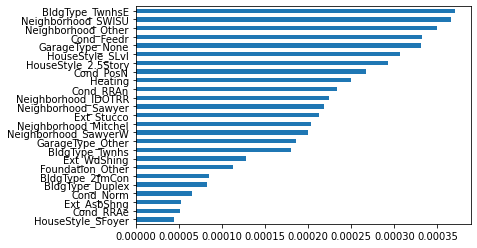

In [272]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

In [273]:
np.any(np.isnan(testset))

False

In [274]:
testset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,SaleType,years_since_built,...,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Ext_VinylSd,Ext_HdBoard,Ext_MetalSd,Ext_Wd_Sdng,Ext_Wd_Shng,Ext_Plywood,Ext_CemntBd,Ext_BrkFace,Ext_WdShing,Ext_Stucco,Ext_AsbShng
0,0.555587,0.363929,0,1,0,0,5,6,0,-0.570108,1,2,2,3,1,3,2,-0.368484,0,2,1,2,0,-1.215588,2,1,2,5,3,0,0,1,1.185945,3,3,2,0.366678,1,1,60,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.604239,0.897861,0,0,0,0,6,6,0,0.041273,1,2,2,3,1,5,1,0.639542,0,2,1,2,0,-0.323539,3,1,3,6,3,0,0,1,-0.741213,3,3,2,2.347867,0,1,63,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.263676,0.809646,0,0,0,0,5,5,0,-0.570108,1,2,3,3,1,6,1,-0.264750,0,3,1,2,0,0.294508,3,1,2,6,3,1,3,3,0.042559,3,3,2,0.930495,1,1,24,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0.458284,0.032064,0,0,0,0,6,6,0,-0.456889,1,2,2,3,1,6,1,-0.269260,0,4,1,2,0,0.243004,3,1,3,7,3,1,4,3,-0.012766,3,3,2,2.089451,0,1,23,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-1.244533,-0.971808,0,0,1,0,8,5,0,-0.570108,2,2,3,3,1,5,1,0.529042,0,4,1,2,0,-0.424487,2,1,3,5,3,0,0,2,0.153210,3,3,2,-0.729632,0,1,29,...,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


Using SVR

In [275]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [276]:
y_pred=regressor.predict(testset)

In [277]:
result_data = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred})
output.to_csv('my_submission1a.csv', index=False)

Catboost

In [278]:
!pip install catboost

     |████████████████████████████████| 65.7MB 55kB/s 


In [279]:
import os
from numpy import mean
from numpy import std
from catboost import CatBoostRegressor
best_grid = CatBoostRegressor()
best_grid.fit(X_train, y_train)
round(best_grid.score(X_train, y_train), 2)

Learning rate set to 0.04175
0:	learn: 77313.1585924	total: 52.4ms	remaining: 52.4s
1:	learn: 75338.5414258	total: 57.8ms	remaining: 28.9s
2:	learn: 73474.8466832	total: 63.1ms	remaining: 21s
3:	learn: 71587.0699913	total: 68.3ms	remaining: 17s
4:	learn: 69844.7338323	total: 77.3ms	remaining: 15.4s
5:	learn: 68099.5174035	total: 83ms	remaining: 13.8s
6:	learn: 66464.9809903	total: 88.3ms	remaining: 12.5s
7:	learn: 64766.5001788	total: 95.4ms	remaining: 11.8s
8:	learn: 63174.2571419	total: 101ms	remaining: 11.1s
9:	learn: 61717.5522841	total: 106ms	remaining: 10.5s
10:	learn: 60139.1502736	total: 111ms	remaining: 9.98s
11:	learn: 58848.1550079	total: 116ms	remaining: 9.59s
12:	learn: 57638.2590860	total: 122ms	remaining: 9.23s
13:	learn: 56330.6960642	total: 127ms	remaining: 8.92s
14:	learn: 55084.5862852	total: 132ms	remaining: 8.66s
15:	learn: 53837.0191003	total: 137ms	remaining: 8.43s
16:	learn: 52681.6539423	total: 142ms	remaining: 8.22s
17:	learn: 51598.8007921	total: 148ms	remain

0.99

In [280]:
y_pred1=best_grid.predict(testset)

In [281]:
result_data1 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred1})
output.to_csv('my_submission2a.csv', index=False)

Using random forest regressor

In [282]:
from sklearn.ensemble import RandomForestRegressor
regressor2=RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=4,
                        min_samples_split=8, n_estimators= 1000)

regressor2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=80, max_features=2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [283]:
y_pred3=regressor2.predict(testset)

In [284]:
result_data2 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred3})
output.to_csv('my_submission3a.csv', index=False)

Using Linear Regression

In [285]:
from sklearn.linear_model import LinearRegression
regressor3 = LinearRegression()
regressor3.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [286]:
y_pred4=regressor3.predict(testset)

In [287]:
result_data4 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred4})
output.to_csv('my_submission4a.csv', index=False)

Using LGBM Regressor

In [288]:
from lightgbm import LGBMRegressor
regressor4 = LGBMRegressor().fit(X_train, y_train)
y_pred5 = regressor4.predict(testset)

In [289]:
result_data5 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred5})
output.to_csv('my_submission5a.csv', index=False)

Using Decision Tree Regressor

In [290]:
from sklearn.tree import DecisionTreeRegressor
regressor5=DecisionTreeRegressor()
regressor5.fit(X_train,y_train)
y_pred6 = regressor5.predict(testset)
result_data6 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred6})
output.to_csv('my_submission6a.csv', index=False)

Using Gradient Boosting

In [291]:
from numpy import mean
from numpy import std
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters = {'learning_rate': [0.04],
                  'subsample'    : [0.5],
                  'n_estimators' : [550, 600, 650],
                  'min_samples_split' : [2,3],
                  'min_samples_leaf' : [1,2],
                  'max_depth'    : [6]
                 }
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=0), param_grid = parameters, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_grid1 = grid_search.best_estimator_
best_grid1

best_grid1.fit(X_train, y_train)
round(best_grid1.score(X_train, y_train), 2)

1.0

In [292]:
y_pred7=best_grid1.predict(testset)
result_data7 = pd.read_csv("sample_submission.csv")
output = pd.DataFrame({'Id': result_data.Id, 'SalePrice': y_pred7})
output.to_csv('my_submission7a.csv', index=False)

In [293]:
trainset.head()

,LotFrontage,LotArea,Alley,LotShape,LandContour,LandSlope,OverallQual,OverallCond,RoofMatl,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,Fence,SaleType,SalePrice,...,Neighborhood_Timber,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Story,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Other,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_Other,Foundation_PConc,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Other,SaleCondition_Other,SaleCondition_Partial,Cond_Norm,Cond_Feedr,Cond_Artery,Cond_RRAn,Cond_PosN,Cond_RRAe,Ext_VinylSd,Ext_HdBoard,Ext_MetalSd,Ext_Wd_Sdng,Ext_Wd_Shng,Ext_Plywood,Ext_CemntBd,Ext_BrkFace,Ext_WdShing,Ext_Stucco,Ext_AsbShng
0,-0.229372,-0.207142,0,1,0,0,7,5,0,0.511418,2,2,3,3,1,6,1,-0.459303,0,4,1,2,0,0.370333,3,1,3,8,3,0,0,2,0.351000,3,3,2,-0.752176,0,1,208500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0.451936,-0.091886,0,1,0,0,6,8,0,-0.574410,1,2,3,3,4,5,1,0.466465,0,4,1,2,0,-0.482512,3,1,2,6,3,1,3,2,-0.060731,3,3,2,1.626195,0,1,181500,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,-0.093110,0.073480,0,0,0,0,7,5,0,0.323060,2,2,3,3,2,6,1,-0.313369,0,4,1,2,0,0.515013,3,1,3,6,3,1,3,2,0.631726,3,3,2,-0.752176,0,1,223500,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.456474,-0.096897,0,0,0,0,7,5,0,-0.574410,1,2,2,4,1,5,1,-0.687324,0,3,1,2,0,0.383659,3,1,3,7,3,1,4,1,0.790804,3,3,2,-0.752176,0,1,140000,...,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
4,0.633618,0.375148,0,0,0,0,8,5,0,1.364570,2,2,3,3,3,6,1,0.199680,0,4,1,2,0,1.299326,4,1,3,9,3,1,3,2,1.698485,3,3,2,0.780197,0,1,250000,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [297]:
#correlation matrix
num=trainset.select_dtypes(exclude='object')
numcorr=num.corr()
Num=numcorr['SalePrice'].sort_values(ascending=False).head(10).to_frame()

cm = sns.light_palette("cyan", as_cmap=True)
s = Num.style.background_gradient(cmap=cm)
s

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
TotFlrSF,0.716883
GrLivArea,0.708624
ExterQual,0.682639
KitchenQual,0.659600
GarageArea,0.623431
BsmtQual,0.622925
TotalBsmtSF,0.613581
TotalFullBath,0.582934
